In [1]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
from PIL import Image
warnings.filterwarnings('ignore')

This project will analyse Depression as one of Chronic Health Indicators. BFRS Ground data is downloaded, followed by five Google Trend queries in particular:

1. Depression
2. Major depresive disorder
3. Mood disorder
4. ICD10 (official code for depression)
5. Suicide

as well as additional information from external sources on

6. Income
7. Poverty
8. Health Insurance

in order to study spatial and temporal correlation between data and build a linear regression models in part 2 of exercise for predicting ground truth based on several indicators using 5-fold cross validation.

Models RMSE varies between 9 and 11 which does not imply a great predictability given used and tried features.

In [2]:
# BFRS ground truth data on state level is given in yearly CSV files, which are read and 
# combined together in a compact and adequate form for further analysis. 

# Reading and combining age-adjusted indicators per year
age16 = pd.read_csv("2016Age.csv", nrows=54)
age15 = pd.read_csv("2015Age.csv", nrows=53)
age14 = pd.read_csv("2014Age.csv", nrows=53)
age13 = pd.read_csv("2013Age.csv", nrows=53)
age12 = pd.read_csv("2012Age.csv", nrows=53)
age11 = pd.read_csv("2011Age.csv", nrows=53)
ageComb = age16.append(age15)
ageComb = ageComb.append(age14)
ageComb = ageComb.append(age13)
ageComb = ageComb.append(age12)
ageComb = ageComb.append(age11)

# Sum data by year and state in order to get yearly/state level information
ageGr = ageComb.groupby(['Year']).mean().reset_index(0, drop=False)
ageGr2 = ageComb.groupby(['LocationAbbr','Year']).mean().reset_index(0, drop=False)
ageGr2 = ageGr2.reset_index(0)

# Reading and combining crude indicators per year
crude16 = pd.read_csv("2016Crude.csv", nrows=56)
crude15 = pd.read_csv("2015Crude.csv", nrows=55)
crude14 = pd.read_csv("2014Crude.csv", nrows=55)
crude13 = pd.read_csv("2013Crude.csv", nrows=55)
crude12 = pd.read_csv("2012Crude.csv", nrows=55)
crude11 = pd.read_csv("2011Crude.csv", nrows=55)
crudeComb = crude16.append(crude15)
crudeComb = crudeComb.append(crude14)
crudeComb = crudeComb.append(crude13)
crudeComb = crudeComb.append(crude12)
crudeComb = crudeComb.append(crude11)

# Sum data by year and state in order to get yearly/state level information
crudeGr = crudeComb.groupby(['Year']).mean().reset_index(0, drop=False)
crudeGr2 = crudeComb.groupby(['LocationAbbr','Year']).mean().reset_index(0, drop=False)
crudeGr2 = crudeGr2.reset_index(0)

crudeGr.head()

,Year,ID,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationOrder,ParentStateDisplayOrder,FootnoteType,FootNoteSymbol,FootnoteText,URL,DatasourceAbbr,Agency
0,2011,1.847970e+06,17.676364,NaN,NaN,16.460377,18.909434,1659.727273,28.127273,28.127273,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,1.995051e+06,17.903636,NaN,NaN,16.694340,19.109434,1595.618182,28.127273,28.127273,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2.171529e+06,18.841818,NaN,NaN,17.609434,20.088679,1743.272727,28.127273,28.127273,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,2.370020e+06,18.774545,NaN,NaN,17.507547,20.033962,1606.127273,28.127273,28.127273,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,2.583225e+06,18.812727,NaN,NaN,17.475472,20.152830,1525.309091,28.127273,28.127273,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Google trends data for mentioned 5 queries is downloaded/read in yearly files, and combined together to make it
# appropriate for further analysis.

#Depression
q1t1 = pd.read_csv("moodDepression2011.csv", skiprows=1) 
q1t1['Year'] = 2011
q1t1.columns = ['Region','Depression','Year']
q1t2 = pd.read_csv("moodDepression2012.csv", skiprows=1) 
q1t2['Year'] = 2012
q1t2.columns = ['Region','Depression','Year']
q1t3 = pd.read_csv("moodDepression2013.csv", skiprows=1) 
q1t3['Year'] = 2013
q1t3.columns = ['Region','Depression','Year']
q1t4 = pd.read_csv("moodDepression2014.csv", skiprows=1) 
q1t4['Year'] = 2014
q1t4.columns = ['Region','Depression','Year']
q1t5 = pd.read_csv("moodDepression2015.csv", skiprows=1) 
q1t5['Year'] = 2015
q1t5.columns = ['Region','Depression','Year']
q1t6 = pd.read_csv("moodDepression2016.csv", skiprows=1) 
q1t6['Year'] = 2016
q1t6.columns = ['Region','Depression','Year']

query1spatial = q1t1.append(q1t2)
query1spatial = query1spatial.append(q1t3)
query1spatial = query1spatial.append(q1t4)
query1spatial = query1spatial.append(q1t5)
query1spatial = query1spatial.append(q1t6)

#Major depresive disorder
q2t1 = pd.read_csv("MDD2011.csv", skiprows=1) 
q2t1['Year'] = 2011
q2t1.columns = ['Region','MDD','Year']
q2t2 = pd.read_csv("MDD2012.csv", skiprows=1) 
q2t2['Year'] = 2012
q2t2.columns = ['Region','MDD','Year']
q2t3 = pd.read_csv("MDD2013.csv", skiprows=1) 
q2t3['Year'] = 2013
q2t3.columns = ['Region','MDD','Year']
q2t4 = pd.read_csv("MDD2014.csv", skiprows=1) 
q2t4['Year'] = 2014
q2t4.columns = ['Region','MDD','Year']
q2t5 = pd.read_csv("MDD2015.csv", skiprows=1) 
q2t5['Year'] = 2015
q2t5.columns = ['Region','MDD','Year']
q2t6 = pd.read_csv("MDD2016.csv", skiprows=1) 
q2t6['Year'] = 2016
q2t6.columns = ['Region','MDD','Year']

query2spatial = q2t1.append(q2t2)
query2spatial = query2spatial.append(q2t3)
query2spatial = query2spatial.append(q2t4)
query2spatial = query2spatial.append(q2t5)
query2spatial = query2spatial.append(q2t6)

#Mood disorder
q3t1 = pd.read_csv("moodDisorder2011.csv", skiprows=1) 
q3t1['Year'] = 2011
q3t1.columns = ['Region','moodDisorder','Year']
q3t2 = pd.read_csv("moodDisorder2012.csv", skiprows=1) 
q3t2['Year'] = 2012
q3t2.columns = ['Region','moodDisorder','Year']
q3t3 = pd.read_csv("moodDisorder2013.csv", skiprows=1) 
q3t3['Year'] = 2013
q3t3.columns = ['Region','moodDisorder','Year']
q3t4 = pd.read_csv("moodDisorder2014.csv", skiprows=1) 
q3t4['Year'] = 2014
q3t4.columns = ['Region','moodDisorder','Year']
q3t5 = pd.read_csv("moodDisorder2015.csv", skiprows=1) 
q3t5['Year'] = 2015
q3t5.columns = ['Region','moodDisorder','Year']
q3t6 = pd.read_csv("moodDisorder2016.csv", skiprows=1) 
q3t6['Year'] = 2016
q3t6.columns = ['Region','moodDisorder','Year']

query3spatial = q3t1.append(q3t2)
query3spatial = query3spatial.append(q3t3)
query3spatial = query3spatial.append(q3t4)
query3spatial = query3spatial.append(q3t5)
query3spatial = query3spatial.append(q3t6)

#ICD10
q4t1 = pd.read_csv("icd2011.csv", skiprows=1) 
q4t1['Year'] = 2011
q4t1.columns = ['Region','ICD10','Year']
q4t2 = pd.read_csv("icd2012.csv", skiprows=1) 
q4t2['Year'] = 2012
q4t2.columns = ['Region','ICD10','Year']
q4t3 = pd.read_csv("icd2013.csv", skiprows=1) 
q4t3['Year'] = 2013
q4t3.columns = ['Region','ICD10','Year']
q4t4 = pd.read_csv("icd2014.csv", skiprows=1) 
q4t4['Year'] = 2014
q4t4.columns = ['Region','ICD10','Year']
q4t5 = pd.read_csv("icd2015.csv", skiprows=1) 
q4t5['Year'] = 2015
q4t5.columns = ['Region','ICD10','Year']
q4t6 = pd.read_csv("icd2016.csv", skiprows=1) 
q4t6['Year'] = 2016
q4t6.columns = ['Region','ICD10','Year']

query4spatial = q4t1.append(q4t2)
query4spatial = query4spatial.append(q4t3)
query4spatial = query4spatial.append(q4t4)
query4spatial = query4spatial.append(q4t5)
query4spatial = query4spatial.append(q4t6)

#Suicide
q5t1 = pd.read_csv("suicide2011.csv", skiprows=1) 
q5t1['Year'] = 2011
q5t1.columns = ['Region','Suicide','Year']
q5t2 = pd.read_csv("suicide2012.csv", skiprows=1) 
q5t2['Year'] = 2012
q5t2.columns = ['Region','Suicide','Year']
q5t3 = pd.read_csv("suicide2013.csv", skiprows=1) 
q5t3['Year'] = 2013
q5t3.columns = ['Region','Suicide','Year']
q5t4 = pd.read_csv("suicide2014.csv", skiprows=1) 
q5t4['Year'] = 2014
q5t4.columns = ['Region','Suicide','Year']
q5t5 = pd.read_csv("suicide2015.csv", skiprows=1) 
q5t5['Year'] = 2015
q5t5.columns = ['Region','Suicide','Year']
q5t6 = pd.read_csv("suicide2016.csv", skiprows=1) 
q5t6['Year'] = 2016
q5t6.columns = ['Region','Suicide','Year']

query5spatial = q5t1.append(q5t2)
query5spatial = query5spatial.append(q5t3)
query5spatial = query5spatial.append(q5t4)
query5spatial = query5spatial.append(q5t5)
query5spatial = query5spatial.append(q5t6)

query5spatial.head()

,Region,Suicide,Year
0,Vermont,100,2011
1,New Hampshire,92,2011
2,Rhode Island,91,2011
3,West Virginia,90,2011
4,Alaska,88,2011


In [4]:
# In order to proceed it is necessery to prepare data for merging which consists of adding same abbreviations 
# for states as in some files they are "NY" while in another "New York" or "NewYork", so common ground is required.
states = pd.read_excel("States.xlsx")
crudeGr3 = pd.merge(crudeGr2, states, how='left', left_on=crudeGr2['LocationAbbr'], right_on=states['Abbr'])
ageGr3 = pd.merge(ageGr2, states, how='left', left_on=ageGr2['LocationAbbr'], right_on=states['Abbr'])
query1spatial1 = pd.merge(query1spatial, states, how='left', left_on=query1spatial['Region'], right_on=states['States1'])
query2spatial1 = pd.merge(query2spatial, states, how='left', left_on=query2spatial['Region'], right_on=states['States1'])
query3spatial1 = pd.merge(query3spatial, states, how='left', left_on=query3spatial['Region'], right_on=states['States1'])
query4spatial1 = pd.merge(query4spatial, states, how='left', left_on=query4spatial['Region'], right_on=states['States1'])
query5spatial1 = pd.merge(query5spatial, states, how='left', left_on=query5spatial['Region'], right_on=states['States1'])
query5spatial1.head()

,Region,Suicide,Year,States,States1,States2,Abbr
0,Vermont,100,2011,Vermont,Vermont,vermont,VT
1,New Hampshire,92,2011,NewHampshire,New Hampshire,new hampshire,NH
2,Rhode Island,91,2011,RhodeIsland,Rhode Island,rhode island,RI
3,West Virginia,90,2011,WestVirginia,West Virginia,west virginia,WV
4,Alaska,88,2011,Alaska,Alaska,alaska,AK


In [5]:
# Data from each query is combined with Ground Truth by merging on States and Year.
# NA's (Guam for example) filled with value of 80 which is mean.

#Crude vs Queries
crVSq1 = pd.merge(crudeGr3, query1spatial1, how='left', on=['States','Year'])
crVSq2 = pd.merge(crudeGr3, query2spatial1, how='left', on=['States','Year'])
crVSq3 = pd.merge(crudeGr3, query3spatial1, how='left', on=['States','Year'])
crVSq4 = pd.merge(crudeGr3, query4spatial1, how='left', on=['States','Year'])
crVSq5 = pd.merge(crudeGr3, query5spatial1, how='left', on=['States','Year'])
crVSq1 = crVSq1.fillna(80)
crVSq2 = crVSq2.fillna(80)
crVSq3 = crVSq3.fillna(80)
crVSq4 = crVSq4.fillna(80)
crVSq5 = crVSq5.fillna(80)

#Age vs Queries
agVSq1 = pd.merge(ageGr3, query1spatial1, how='left', on=['States','Year'])
agVSq2 = pd.merge(ageGr3, query2spatial1, how='left', on=['States','Year'])
agVSq3 = pd.merge(ageGr3, query3spatial1, how='left', on=['States','Year'])
agVSq4 = pd.merge(ageGr3, query4spatial1, how='left', on=['States','Year'])
agVSq5 = pd.merge(ageGr3, query5spatial1, how='left', on=['States','Year'])
agVSq1 = agVSq1.fillna(80)
agVSq2 = agVSq2.fillna(80)
agVSq3 = agVSq3.fillna(80)
agVSq4 = agVSq4.fillna(80)
agVSq5 = agVSq5.fillna(80)

agVSq5.head()

,Year,LocationAbbr,ID,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationOrder,...,Agency,States,States1_x,States2_x,Abbr_x,Region,Suicide,States1_y,States2_y,Abbr_y
0,2011,AK,2922380,16.5,80.0,80.0,14.7,18.3,608,4,...,80.0,Alaska,Alaska,alaska,AK,Alaska,88.0,Alaska,alaska,AK
1,2012,AK,2926781,16.6,80.0,80.0,15.0,18.2,754,4,...,80.0,Alaska,Alaska,alaska,AK,Alaska,85.0,Alaska,alaska,AK
2,2013,AK,2931200,16.1,80.0,80.0,14.6,17.6,778,4,...,80.0,Alaska,Alaska,alaska,AK,Alaska,94.0,Alaska,alaska,AK
3,2014,AK,2938027,15.4,80.0,80.0,13.9,16.9,717,4,...,80.0,Alaska,Alaska,alaska,AK,Alaska,94.0,Alaska,alaska,AK
4,2015,AK,2944864,15.8,80.0,80.0,13.8,17.8,570,4,...,80.0,Alaska,Alaska,alaska,AK,Alaska,98.0,Alaska,alaska,AK


# Part 1.1

In [6]:
# Spatial and Temporal Correlation analysis
# In order to store results of correlation between ground trurth and google trends new variables are created, 
# and Pearson correlation is used to determine actual coefficient.

# Spatial Correlation analysis
# Crude ground trurth
crVSq1corr = {}
crVSq2corr = {}
crVSq3corr = {}
crVSq4corr = {}
crVSq5corr = {}

i = 0

for k in states['States1']:
    tempq1 = crVSq1[crVSq1['States1_x'] == k]
    temp1q1 = tempq1[['Year','Data_Value','Depression','States','States1_x','LocationAbbr']]
    temp2q1 = pearsonr(temp1q1['Data_Value'],temp1q1['Depression'])
    crVSq1corr[i] = [k,temp2q1[0]]
    
    tempq2 = crVSq2[crVSq2['States1_x'] == k]
    temp1q2 = tempq2[['Year','Data_Value','MDD','States','States1_x','LocationAbbr']]
    temp2q2 = pearsonr(temp1q2['Data_Value'],temp1q2['MDD'])
    crVSq2corr[i] = [k,temp2q2[0]]

    tempq3 = crVSq3[crVSq3['States1_x'] == k]
    temp1q3 = tempq3[['Year','Data_Value','moodDisorder','States','States1_x','LocationAbbr']]
    temp2q3 = pearsonr(temp1q3['Data_Value'],temp1q3['moodDisorder'])
    crVSq3corr[i] = [k,temp2q3[0]]

    tempq4 = crVSq4[crVSq4['States1_x'] == k]
    temp1q4 = tempq4[['Year','Data_Value','ICD10','States','States1_x','LocationAbbr']]
    temp2q4 = pearsonr(temp1q4['Data_Value'],temp1q4['ICD10'])
    crVSq4corr[i] = [k, temp2q1[0]]

    tempq5 = crVSq5[crVSq5['States1_x'] == k]
    temp1q5 = tempq5[['Year','Data_Value','Suicide','States','States1_x','LocationAbbr']]
    temp2q5 = pearsonr(temp1q5['Data_Value'],temp1q5['Suicide'])
    crVSq5corr[i] = [k,temp2q5[0]]

    i = i + 1


# Age-adjusted ground trurth
agVSq1corr = {}
agVSq2corr = {}
agVSq3corr = {}
agVSq4corr = {}
agVSq5corr = {}

i = 0

for k in states['States1']:
    tempq1 = agVSq1[agVSq1['States1_x'] == k]
    temp1q1 = tempq1[['Year','Data_Value','Depression','States','States1_x','LocationAbbr']]
    temp2q1 = pearsonr(temp1q1['Data_Value'],temp1q1['Depression'])
    #agVSq1corr.update({'k', temp2q1[0]})
    agVSq1corr[i] = [k,temp2q1[0]]
    
    tempq2 = agVSq2[agVSq2['States1_x'] == k]
    temp1q2 = tempq2[['Year','Data_Value','MDD','States','States1_x','LocationAbbr']]
    temp2q2 = pearsonr(temp1q2['Data_Value'],temp1q2['MDD'])
    agVSq2corr[i] = [k,temp2q2[0]]

    tempq3 = agVSq3[agVSq3['States1_x'] == k]
    temp1q3 = tempq3[['Year','Data_Value','moodDisorder','States','States1_x','LocationAbbr']]
    temp2q3 = pearsonr(temp1q3['Data_Value'],temp1q3['moodDisorder'])
    agVSq3corr[i] = [k,temp2q3[0]]

    tempq4 = agVSq4[agVSq4['States1_x'] == k]
    temp1q4 = tempq4[['Year','Data_Value','ICD10','States','States1_x','LocationAbbr']]
    temp2q4 = pearsonr(temp1q4['Data_Value'],temp1q4['ICD10'])
    agVSq4corr[i] = [k,temp2q1[0]]

    tempq5 = agVSq5[agVSq5['States1_x'] == k]
    temp1q5 = tempq5[['Year','Data_Value','Suicide','States','States1_x','LocationAbbr']]
    temp2q5 = pearsonr(temp1q5['Data_Value'],temp1q5['Suicide'])
    agVSq5corr[i] = [k,temp2q5[0]]

    i = i + 1

# Temporal Correlation analysis
# Crude ground trurth
crVSq1Ycorr = {}
crVSq2Ycorr = {}
crVSq3Ycorr = {}
crVSq4Ycorr = {}
crVSq5Ycorr = {}

i = 0
years = [2011,2012,2013,2014,2015,2016]

for k in years:
    tempq1 = crVSq1[crVSq1['Year'] == k]
    temp1q1 = tempq1[['Year','Data_Value','Depression','States','States1_x','LocationAbbr']]
    temp2q1 = pearsonr(temp1q1['Data_Value'],temp1q1['Depression'])
    crVSq1Ycorr[i] = [k,temp2q1[0]]
    
    tempq2 = crVSq2[crVSq2['Year'] == k]
    temp1q2 = tempq2[['Year','Data_Value','MDD','States','States1_x','LocationAbbr']]
    temp2q2 = pearsonr(temp1q2['Data_Value'],temp1q2['MDD'])
    crVSq2Ycorr[i] = [k,temp2q2[0]]

    tempq3 = crVSq3[crVSq3['Year'] == k]
    temp1q3 = tempq3[['Year','Data_Value','moodDisorder','States','States1_x','LocationAbbr']]
    temp2q3 = pearsonr(temp1q3['Data_Value'],temp1q3['moodDisorder'])
    crVSq3Ycorr[i] = [k,temp2q3[0]]

    tempq4 = crVSq4[crVSq4['Year'] == k]
    temp1q4 = tempq4[['Year','Data_Value','ICD10','States','States1_x','LocationAbbr']]
    temp2q4 = pearsonr(temp1q4['Data_Value'],temp1q4['ICD10'])
    crVSq4Ycorr[i] = [k,temp2q4[0]]

    tempq5 = crVSq5[crVSq5['Year'] == k]
    temp1q5 = tempq5[['Year','Data_Value','Suicide','States','States1_x','LocationAbbr']]
    temp2q5 = pearsonr(temp1q5['Data_Value'],temp1q5['Suicide'])
    crVSq5Ycorr[i] = [k,temp2q5[0]]

    i = i + 1

# Age-adjusted ground truth
agVSq1Ycorr = {}
agVSq2Ycorr = {}
agVSq3Ycorr = {}
agVSq4Ycorr = {}
agVSq5Ycorr = {}

i = 0
years = [2011,2012,2013,2014,2015,2016]

for k in years:
    tempq1 = agVSq1[agVSq1['Year'] == k]
    temp1q1 = tempq1[['Year','Data_Value','Depression','States','States1_x','LocationAbbr']]
    temp2q1 = pearsonr(temp1q1['Data_Value'],temp1q1['Depression'])
    agVSq1Ycorr[i] = [k,temp2q1[0]]
    
    tempq2 = agVSq2[agVSq2['Year'] == k]
    temp1q2 = tempq2[['Year','Data_Value','MDD','States','States1_x','LocationAbbr']]
    temp2q2 = pearsonr(temp1q2['Data_Value'],temp1q2['MDD'])
    agVSq2Ycorr[i] = [k,temp2q2[0]]

    tempq3 = agVSq3[agVSq3['Year'] == k]
    temp1q3 = tempq3[['Year','Data_Value','moodDisorder','States','States1_x','LocationAbbr']]
    temp2q3 = pearsonr(temp1q3['Data_Value'],temp1q3['moodDisorder'])
    agVSq3Ycorr[i] = [k,temp2q3[0]]

    tempq4 = agVSq4[agVSq4['Year'] == k]
    temp1q4 = tempq4[['Year','Data_Value','ICD10','States','States1_x','LocationAbbr']]
    temp2q4 = pearsonr(temp1q4['Data_Value'],temp1q4['ICD10'])
    agVSq4Ycorr[i] = [k,temp2q4[0]]

    tempq5 = agVSq5[agVSq5['Year'] == k]
    temp1q5 = tempq5[['Year','Data_Value','Suicide','States','States1_x','LocationAbbr']]
    temp2q5 = pearsonr(temp1q5['Data_Value'],temp1q5['Suicide'])
    agVSq5Ycorr[i] = [k,temp2q5[0]]

    i = i + 1

    
# Preparing data for actual use by setting it in dataframe, adding namecolumns and transposing it.
agVSq1corrDf = pd.DataFrame(agVSq1corr)
agVSq1corrDf = agVSq1corrDf.transpose()
agVSq1corrDf.columns = ['State','Corr']

agVSq2corrDf = pd.DataFrame(agVSq2corr)
agVSq2corrDf = agVSq2corrDf.transpose()
agVSq2corrDf.columns = ['State','Corr']

agVSq3corrDf = pd.DataFrame(agVSq3corr)
agVSq3corrDf = agVSq3corrDf.transpose()
agVSq3corrDf.columns = ['State','Corr']

agVSq4corrDf = pd.DataFrame(agVSq4corr)
agVSq4corrDf = agVSq4corrDf.transpose()
agVSq4corrDf.columns = ['State','Corr']

agVSq5corrDf = pd.DataFrame(agVSq5corr)
agVSq5corrDf = agVSq5corrDf.transpose()
agVSq5corrDf.columns = ['State','Corr']

crVSq1corrDf = pd.DataFrame(crVSq1corr)
crVSq1corrDf = crVSq1corrDf.transpose()
crVSq1corrDf.columns = ['State','Corr']

crVSq2corrDf = pd.DataFrame(crVSq2corr)
crVSq2corrDf = crVSq2corrDf.transpose()
crVSq2corrDf.columns = ['State','Corr']

crVSq3corrDf = pd.DataFrame(crVSq3corr)
crVSq3corrDf = crVSq3corrDf.transpose()
crVSq3corrDf.columns = ['State','Corr']

crVSq4corrDf = pd.DataFrame(crVSq4corr)
crVSq4corrDf = crVSq4corrDf.transpose()
crVSq4corrDf.columns = ['State','Corr']

crVSq5corrDf = pd.DataFrame(crVSq5corr)
crVSq5corrDf = crVSq5corrDf.transpose()
crVSq5corrDf.columns = ['State','Corr']

agVSq1YcorrDf = pd.DataFrame(agVSq1Ycorr)
agVSq1YcorrDf = agVSq1YcorrDf.transpose()
agVSq1YcorrDf.columns = ['Year','Corr']

agVSq2YcorrDf = pd.DataFrame(agVSq2Ycorr)
agVSq2YcorrDf = agVSq2YcorrDf.transpose()
agVSq2YcorrDf.columns = ['Year','Corr']

agVSq3YcorrDf = pd.DataFrame(agVSq3Ycorr)
agVSq3YcorrDf = agVSq3YcorrDf.transpose()
agVSq3YcorrDf.columns = ['Year','Corr']

agVSq4YcorrDf = pd.DataFrame(agVSq4Ycorr)
agVSq4YcorrDf = agVSq4YcorrDf.transpose()
agVSq4YcorrDf.columns = ['Year','Corr']

agVSq5YcorrDf = pd.DataFrame(agVSq5Ycorr)
agVSq5YcorrDf = agVSq5YcorrDf.transpose()
agVSq5YcorrDf.columns = ['Year','Corr']

crVSq1YcorrDf = pd.DataFrame(crVSq1Ycorr)
crVSq1YcorrDf = crVSq1YcorrDf.transpose()
crVSq1YcorrDf.columns = ['Year','Corr']

crVSq2YcorrDf = pd.DataFrame(crVSq2Ycorr)
crVSq2YcorrDf = crVSq2YcorrDf.transpose()
crVSq2YcorrDf.columns = ['Year','Corr']

crVSq3YcorrDf = pd.DataFrame(crVSq3Ycorr)
crVSq3YcorrDf = crVSq3YcorrDf.transpose()
crVSq3YcorrDf.columns = ['Year','Corr']

crVSq4YcorrDf = pd.DataFrame(crVSq4Ycorr)
crVSq4YcorrDf = crVSq4YcorrDf.transpose()
crVSq4YcorrDf.columns = ['Year','Corr']

crVSq5YcorrDf = pd.DataFrame(crVSq5Ycorr)
crVSq5YcorrDf = crVSq5YcorrDf.transpose()
crVSq5YcorrDf.columns = ['Year','Corr']

agVSq5YcorrDf.head()

,Year,Corr
0,2011.0,0.288943
1,2012.0,0.184979
2,2013.0,0.132633
3,2014.0,0.128987
4,2015.0,0.074473


In [7]:
# Export spatial data in order to use R to plot it.
crVSq1corrDf.to_csv('crVSq1.csv')
crVSq2corrDf.to_csv('crVSq2.csv')
crVSq3corrDf.to_csv('crVSq3.csv')
crVSq4corrDf.to_csv('crVSq4.csv')
crVSq5corrDf.to_csv('crVSq5.csv')

agVSq1corrDf.to_csv('agVSq1.csv')
agVSq2corrDf.to_csv('agVSq2.csv')
agVSq3corrDf.to_csv('agVSq3.csv')
agVSq4corrDf.to_csv('agVSq4.csv')
agVSq5corrDf.to_csv('agVSq5.csv')

Temporal correlation data spands between 2011 and 2016. Overall, there is a significant divergance and uncorrelation between queries 1, 2 and queries 2,3 and 4. The first two queiries show an increasing correlation trend over the past few years, while they are currently at similar levels as in 2011. While the remining queiries have downtrend in their significance and don't show strong correlation with the ground truth. Same can be said for both crude and age-adjusted data.

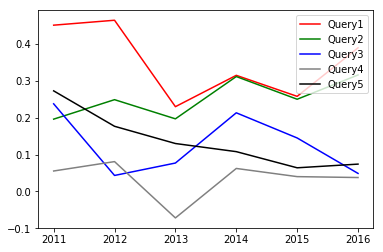

In [8]:
# Plot temporal correlation data between crude ground trurth and 5 google trend queries.
plt.gca().set_color_cycle(['red', 'green', 'blue', 'gray','black'])
plt.plot(years, crVSq1YcorrDf['Corr'])
plt.plot(years, crVSq2YcorrDf['Corr'])
plt.plot(years, crVSq3YcorrDf['Corr'])
plt.plot(years, crVSq4YcorrDf['Corr'])
plt.plot(years, crVSq5YcorrDf['Corr'])
plt.legend(['Query1', 'Query2', 'Query3', 'Query4','Query5'], loc='upper right')
plt.show()

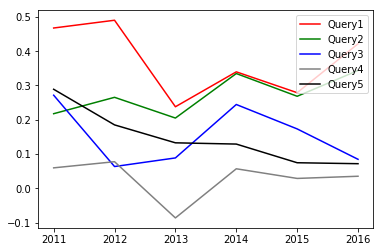

In [9]:
# Plot temporal correlation data between age adjusted ground trurth and 5 google trend queries.

plt.gca().set_color_cycle(['red', 'green', 'blue', 'gray','black'])
plt.plot(years, agVSq1YcorrDf['Corr'])
plt.plot(years, agVSq2YcorrDf['Corr'])
plt.plot(years, agVSq3YcorrDf['Corr'])
plt.plot(years, agVSq4YcorrDf['Corr'])
plt.plot(years, agVSq5YcorrDf['Corr'])
plt.legend(['Query1', 'Query2', 'Query3', 'Query4','Query5'], loc='upper right')
plt.show()

Due to considerable issues with installing Basemap package required for plotting and filling US maps,
I've used R (please find code below) and just imported picture in order to show spatial correlation.

# R Code to generate plots
# code must be in working directory of this notebook to work
library(ggplot2)
library(ggpubr)
library(fiftystater)
data('fifty_states')

states = read.csv("States.csv")
q1 <- read.csv("crVSq1.csv")
q2 <- read.csv("crVSq2.csv")
q3 <- read.csv("crVSq3.csv")
q4 <- read.csv("crVSq4.csv")
q5 <- read.csv("crVSq5.csv")

q1 <- q1[2:3]
q2 <- q2[2:3]
q3 <- q3[2:3]
q4 <- q4[2:3]
q5 <- q5[2:3]

q1$stateL <- tolower(q1$State)
q2$stateL <- tolower(q2$State)
q3$stateL <- tolower(q3$State)
q4$stateL <- tolower(q4$State)
q5$stateL <- tolower(q5$State)

p1 <- ggplot(q1, aes(map_id = stateL)) + 
    geom_map(aes(fill = Corr), map = fifty_states) + 
    expand_limits(x = fifty_states$long, y = fifty_states$lat) +
    coord_map() +
    scale_x_continuous(breaks = NULL) + 
    scale_y_continuous(breaks = NULL) +
    labs(x = "", y = "") +
    theme(legend.position = "none", 
          panel.background = element_blank())+ 
  ggtitle("Query1")

p2 <- ggplot(q2, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query2")

p3 <- ggplot(q3, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query3")

p4 <- ggplot(q4, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query4")

p5 <- ggplot(q5, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "bottom", 
        panel.background = element_blank())+ 
  ggtitle("Query5")

legend <- get_legend(p5)
p0 <- ggdraw(legend,xlim = c(0, 1), ylim = c(0, 1))

p5c <- ggplot(q5, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query5")


ggarrange(p0,p1,p2,p3,p4, p5c, ncol = 2, nrow = 3)
ggsave('crude.png')


q1a <- read.csv("agVSq1.csv")
q2a <- read.csv("agVSq2.csv")
q3a <- read.csv("agVSq3.csv")
q4a <- read.csv("agVSq4.csv")
q5a <- read.csv("agVSq5.csv")

q1a <- q1a[2:3]
q2a <- q2a[2:3]
q3a <- q3a[2:3]
q4a <- q4a[2:3]
q5a <- q5a[2:3]

q1a$stateL <- tolower(q1a$State)
q2a$stateL <- tolower(q2a$State)
q3a$stateL <- tolower(q3a$State)
q4a$stateL <- tolower(q4a$State)
q5a$stateL <- tolower(q5a$State)

p0a <- ggplot(q5a, aes(map_id = stateL)) + 
  geom_map(map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())

p1a <- ggplot(q1a, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query1")

p2a <- ggplot(q2a, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query2")

p3a <- ggplot(q3a, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query3")

p4a <- ggplot(q4a, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank()) + 
  ggtitle("Query4")

p5a <- ggplot(q5a, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "none", 
        panel.background = element_blank())+ 
  ggtitle("Query5")

ggarrange(p0,p1a,p2a,p3a,p4a, p5a, ncol = 2, nrow = 3)
ggsave('age.png')

crVSinc <- read.csv('crVSinc.csv')
agVSinc <- read.csv('agVSinc.csv')
crVSpov <- read.csv('crVSpov.csv')
agVSpov <- read.csv('agVSpov.csv')

crVSinc$stateL <- tolower(crVSinc$State)
agVSinc$stateL <- tolower(agVSinc$State)
crVSpov$stateL <- tolower(crVSpov$State)
agVSpov$stateL <- tolower(agVSpov$State)

PcrVSinc <- ggplot(crVSinc, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+ 
  ggtitle("Crude vs Income")

PagVSinc <- ggplot(agVSinc, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+ 
  ggtitle("Age adjusted vs Income")

ggarrange(PcrVSinc,PagVSinc,ncol = 1, nrow = 2)
ggsave('income.png')

PcrVSpov <- ggplot(crVSpov, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+ 
  ggtitle("Crude vs Poverty")

PagVSpov <- ggplot(agVSpov, aes(map_id = stateL)) + 
  geom_map(aes(fill = Corr), map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+ 
  ggtitle("Age adjusted vs Poverty")

ggarrange(PcrVSpov,PagVSpov,ncol = 1, nrow = 2)
ggsave('poverty.png')

# Comments
Spatial correlation indicates several key takeaways main of which are that south-west US states don't seem to correlate at all with the ground truth while northeren and extreme sweast and west states seem to indicate significant correlation. Additionally, in both crude and age adjusted data the results follow similar pattern. 

It may also be noted that Query 2 doesnt seem to correlate at all with ground data.

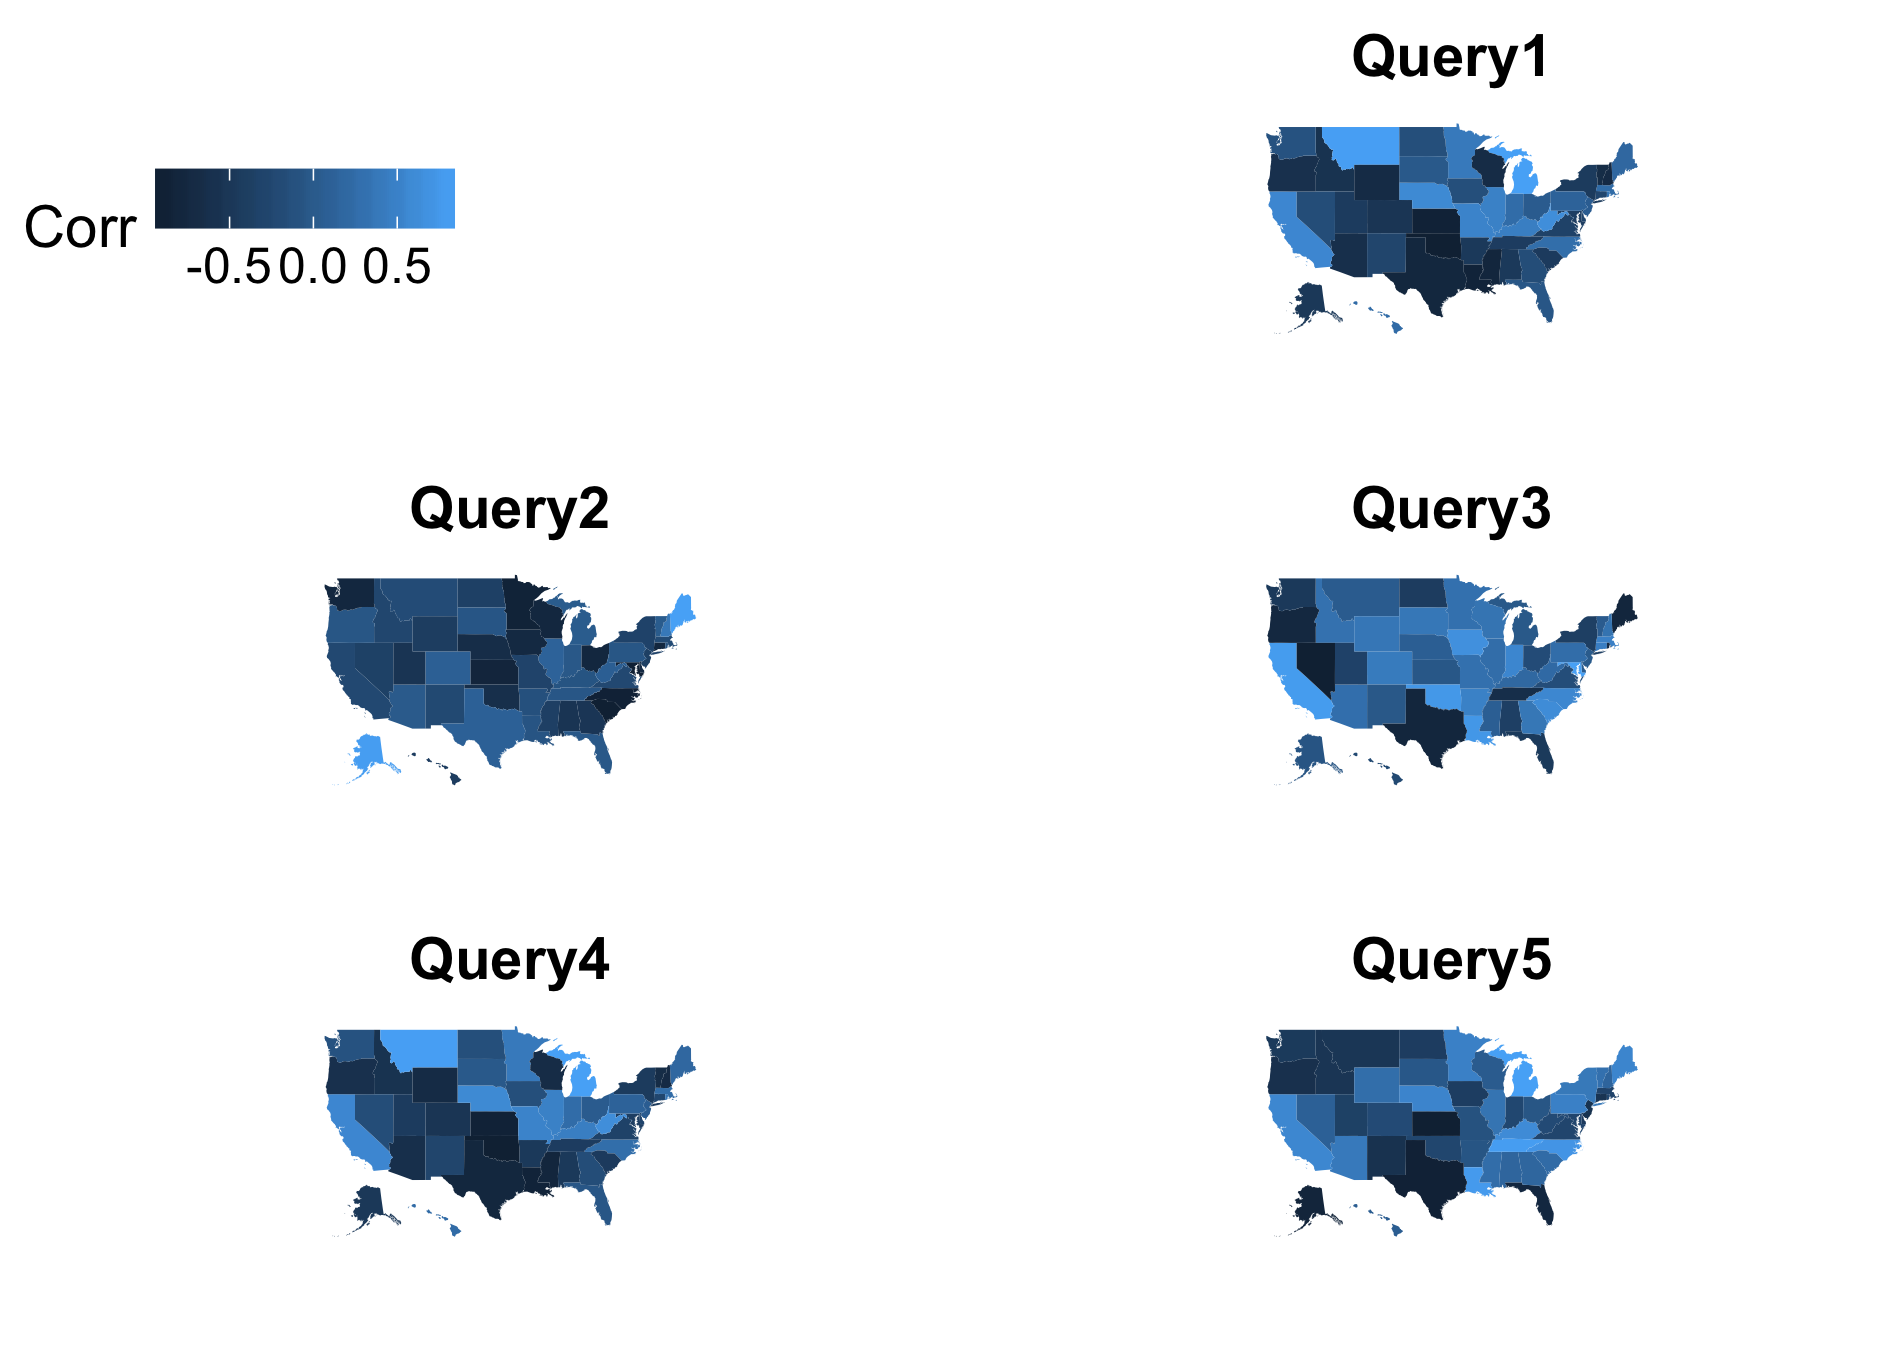

In [11]:
Image.open('crude.png')

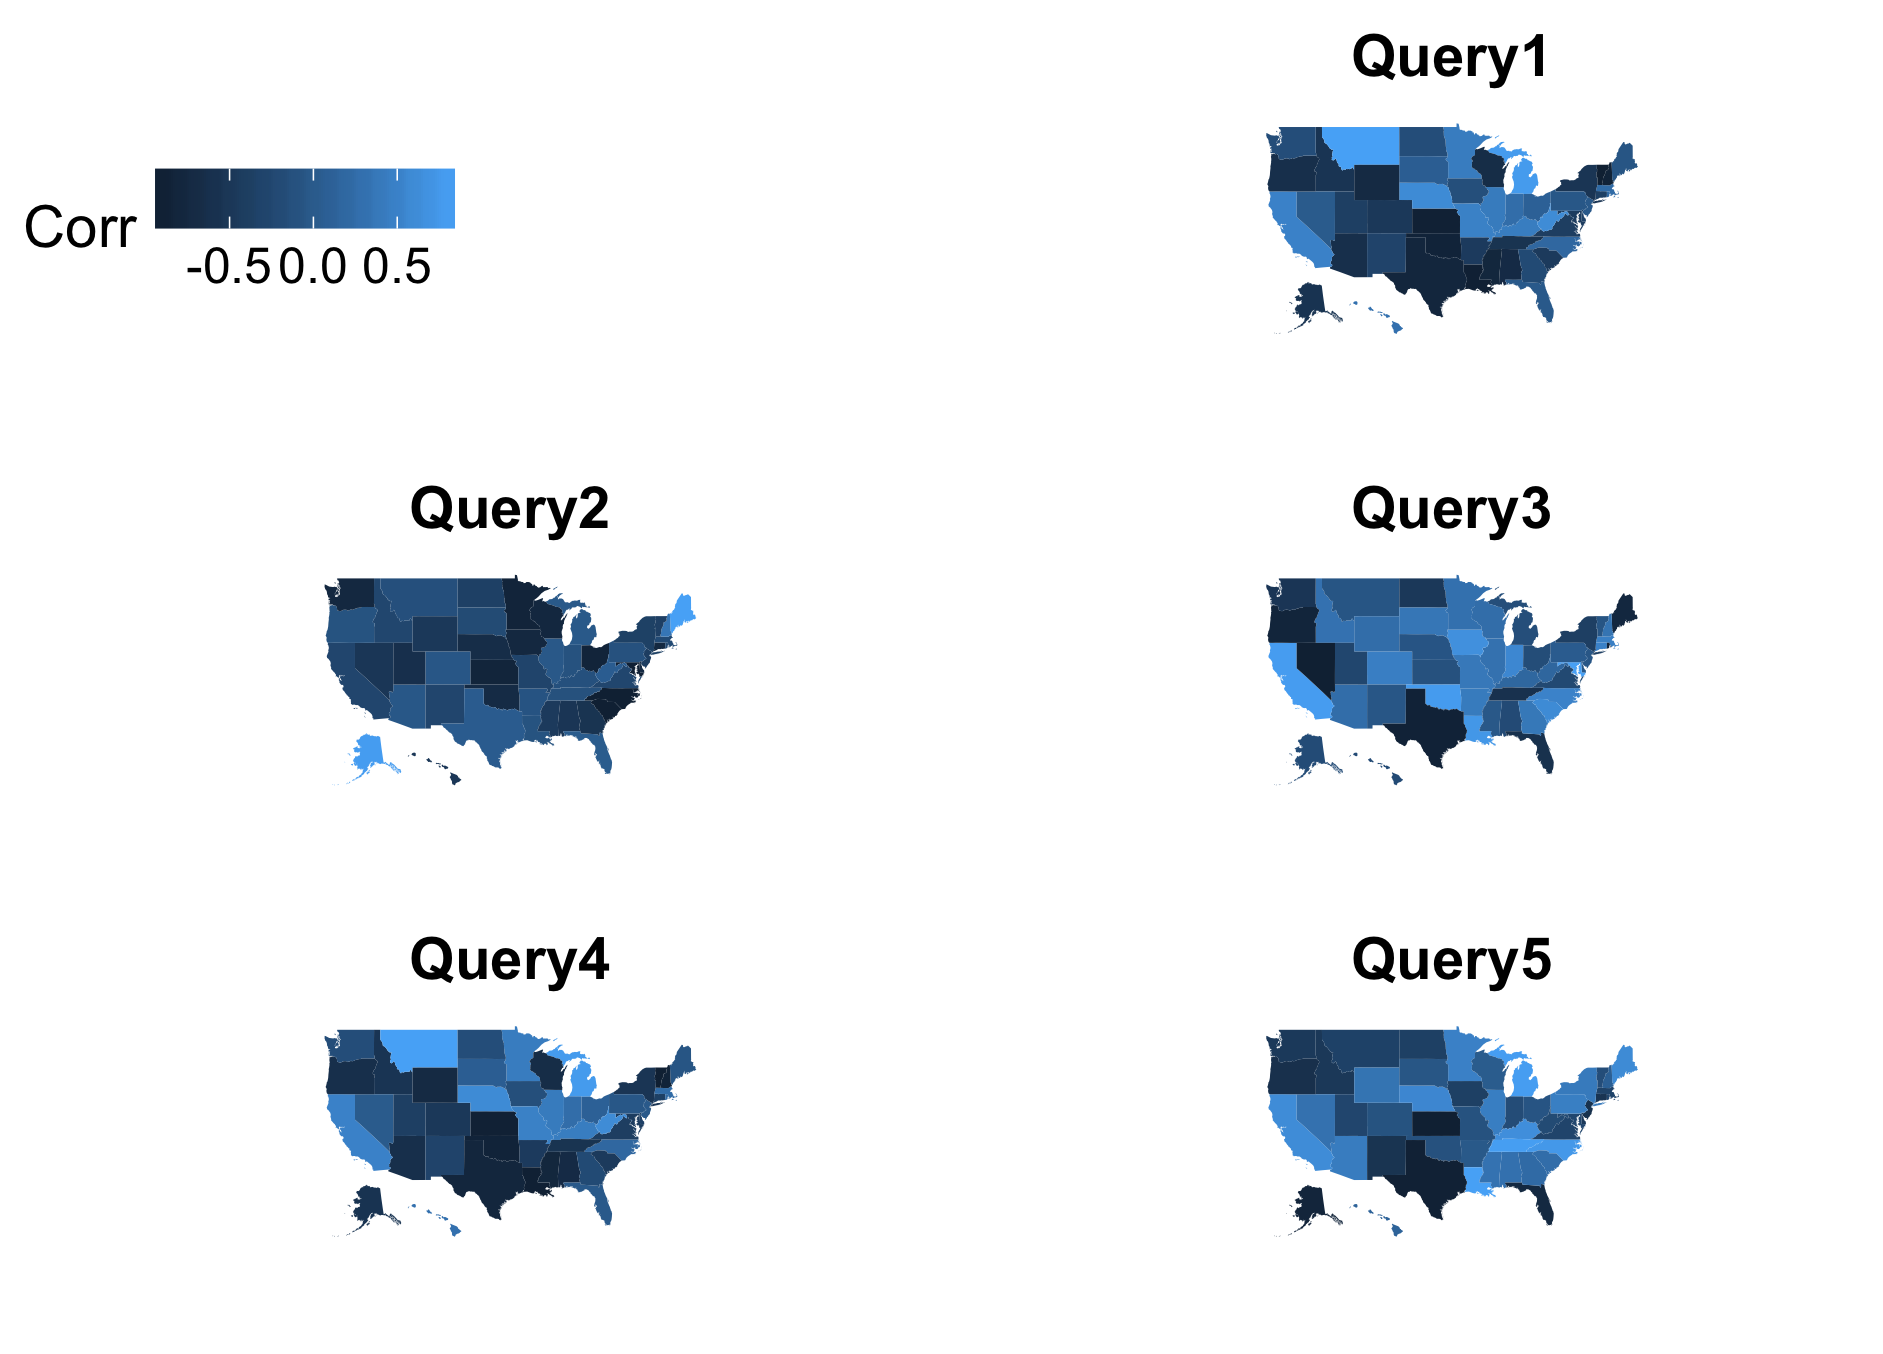

In [12]:
Image.open('age.png')

# Part 1.2

In [13]:
# Read Data on Income, Poverty and Health Insurance
# Melt data in long form in order to be usable

income = pd.read_excel("medIncome2.xlsx")
poverty = pd.read_excel("Poverty.xlsx")

inc1 = pd.melt(income, id_vars=['State'])
pov1 = pd.melt(poverty, id_vars=['States'])
pov1.columns = ['States1','Year','Value']
pov1['HealthIns'] = 100 - pov1['Value']
inc1.columns = ['States1','Year','Value']
pov1.head()

,States1,Year,Value,HealthIns
0,United States,2011,16.720611,83.279389
1,Alabama,2011,20.321472,79.678528
2,Alaska,2011,10.700917,89.299083
3,Arizona,2011,22.906627,77.093373
4,Arkansas,2011,16.100000,83.900000


In [14]:
# Income and Poverty data is merged with Ground Truth by merging on States and Year.
# NA's (Guam for example) filled with value of 80 which is mean.

#Crude vs Income/Poverty
crVSinc = pd.merge(crudeGr3, inc1, how='left', on=['States1','Year'])
crVSpov = pd.merge(crudeGr3, pov1, how='left', on=['States1','Year'])
crVSinc = crVSinc.fillna(80)
crVSpov = crVSpov.fillna(80)

#Age vs Income/Poverty
agVSinc = pd.merge(ageGr3, inc1, how='left', on=['States1','Year'])
agVSpov = pd.merge(ageGr3, pov1, how='left', on=['States1','Year'])
agVSinc = agVSinc.fillna(80)
agVSpov = agVSpov.fillna(80)

crVSpov.head()

,Year,LocationAbbr,ID,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationOrder,...,FootnoteText,URL,DatasourceAbbr,Agency,States,States1,States2,Abbr,Value,HealthIns
0,2011,AK,1777363,16.5,80.0,80.0,14.8,18.3,608,4,...,80.0,80.0,80.0,80.0,Alaska,Alaska,alaska,AK,10.700917,89.299083
1,2012,AK,1922371,16.9,80.0,80.0,15.4,18.5,754,4,...,80.0,80.0,80.0,80.0,Alaska,Alaska,alaska,AK,10.700917,89.299083
2,2013,AK,2071648,16.3,80.0,80.0,14.8,17.8,778,4,...,80.0,80.0,80.0,80.0,Alaska,Alaska,alaska,AK,10.800000,89.200000
3,2014,AK,2275040,15.6,80.0,80.0,14.0,17.1,717,4,...,80.0,80.0,80.0,80.0,Alaska,Alaska,alaska,AK,10.800000,89.200000
4,2015,AK,2471192,16.0,80.0,80.0,14.0,18.0,570,4,...,80.0,80.0,80.0,80.0,Alaska,Alaska,alaska,AK,10.900000,89.100000


In [15]:
#### Spatial Correlation
# Income/Poverty vs Ground Truth

crVSincCorr = {}
agVSincCorr = {}
crVSpovCorr = {}
agVSpovCorr = {}

i = 0

for k in states['States1']:
    temp = crVSinc[crVSinc['States1'] == k]
    temp2 = temp[['Year','Data_Value','Value','States1','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    crVSincCorr[i] = [k,temp3[0]]
    
    temp = agVSinc[agVSinc['States1'] == k]
    temp2 = temp[['Year','Data_Value','Value','States1','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    agVSincCorr[i] = [k,temp3[0]]

    temp = crVSpov[crVSinc['States1'] == k]
    temp2 = temp[['Year','Data_Value','Value','States1','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    crVSpovCorr[i] = [k,temp3[0]]
    
    temp = agVSpov[agVSinc['States1'] == k]
    temp2 = temp[['Year','Data_Value','Value','States1','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    agVSpovCorr[i] = [k,temp3[0]]
    
    i = i + 1

# Temporal Correlation analysis
# Income/Poverty vs Ground Truth

crVSincYcorr = {}
agVSincYcorr = {}
crVSpovYcorr = {}
agVSpovYcorr = {}

i = 0
years = [2011,2012,2013,2014,2015,2016]

for k in years:
    temp = crVSinc[crVSinc['Year'] == k]
    temp2 = temp[['Year','Data_Value','Value','States','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    crVSincYcorr[i] = [k,temp3[0]]

    temp = agVSinc[agVSinc['Year'] == k]
    temp2 = temp[['Year','Data_Value','Value','States','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    agVSincYcorr[i] = [k,temp3[0]]

    temp = crVSpov[crVSpov['Year'] == k]
    temp2 = temp[['Year','Data_Value','Value','States','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    crVSpovYcorr[i] = [k,temp3[0]]

    temp = agVSpov[agVSpov['Year'] == k]
    temp2 = temp[['Year','Data_Value','Value','States','LocationAbbr']]
    temp3 = pearsonr(temp2['Data_Value'],temp2['Value'])
    agVSpovYcorr[i] = [k,temp3[0]]

    i = i + 1

In [16]:
# Preparing data for actual use by setting it in dataframe, adding namecolumns and transposing it.

crVSincCorrDf = pd.DataFrame(crVSincCorr)
crVSincCorrDf = crVSincCorrDf.transpose()
crVSincCorrDf.columns = ['State','Corr']

agVSincCorrDf = pd.DataFrame(agVSincCorr)
agVSincCorrDf = agVSincCorrDf.transpose()
agVSincCorrDf.columns = ['State','Corr']

crVSpovCorrDf = pd.DataFrame(crVSpovCorr)
crVSpovCorrDf = crVSpovCorrDf.transpose()
crVSpovCorrDf.columns = ['State','Corr']

agVSpovCorrDf = pd.DataFrame(agVSpovCorr)
agVSpovCorrDf = agVSpovCorrDf.transpose()
agVSpovCorrDf.columns = ['State','Corr']

crVSincYcorrDf = pd.DataFrame(crVSincYcorr)
crVSincYcorrDf = crVSincYcorrDf.transpose()
crVSincYcorrDf.columns = ['Year','Corr']

agVSincYcorrDf = pd.DataFrame(agVSincYcorr)
agVSincYcorrDf = agVSincYcorrDf.transpose()
agVSincYcorrDf.columns = ['Year','Corr']

crVSpovYcorrDf = pd.DataFrame(crVSpovYcorr)
crVSpovYcorrDf = crVSpovYcorrDf.transpose()
crVSpovYcorrDf.columns = ['Year','Corr']

agVSpovYcorrDf = pd.DataFrame(agVSpovYcorr)
agVSpovYcorrDf = agVSpovYcorrDf.transpose()
agVSpovYcorrDf.columns = ['Year','Corr']

agVSpovYcorrDf.head()

,Year,Corr
0,2011.0,-0.236431
1,2012.0,-0.240881
2,2013.0,-0.275953
3,2014.0,-0.266512
4,2015.0,-0.326492


In [17]:
crVSincCorrDf.to_csv('crVSinc.csv')
agVSincCorrDf.to_csv('agVSinc.csv')
crVSpovCorrDf.to_csv('crVSpov.csv')
agVSpovCorrDf.to_csv('agVSpov.csv')

Income data points out that there is correlation between income and depressesion as positive correlation seembs to be present in most of states. And overall correlation on average seems to be a considerably higher than in part 1.1. 

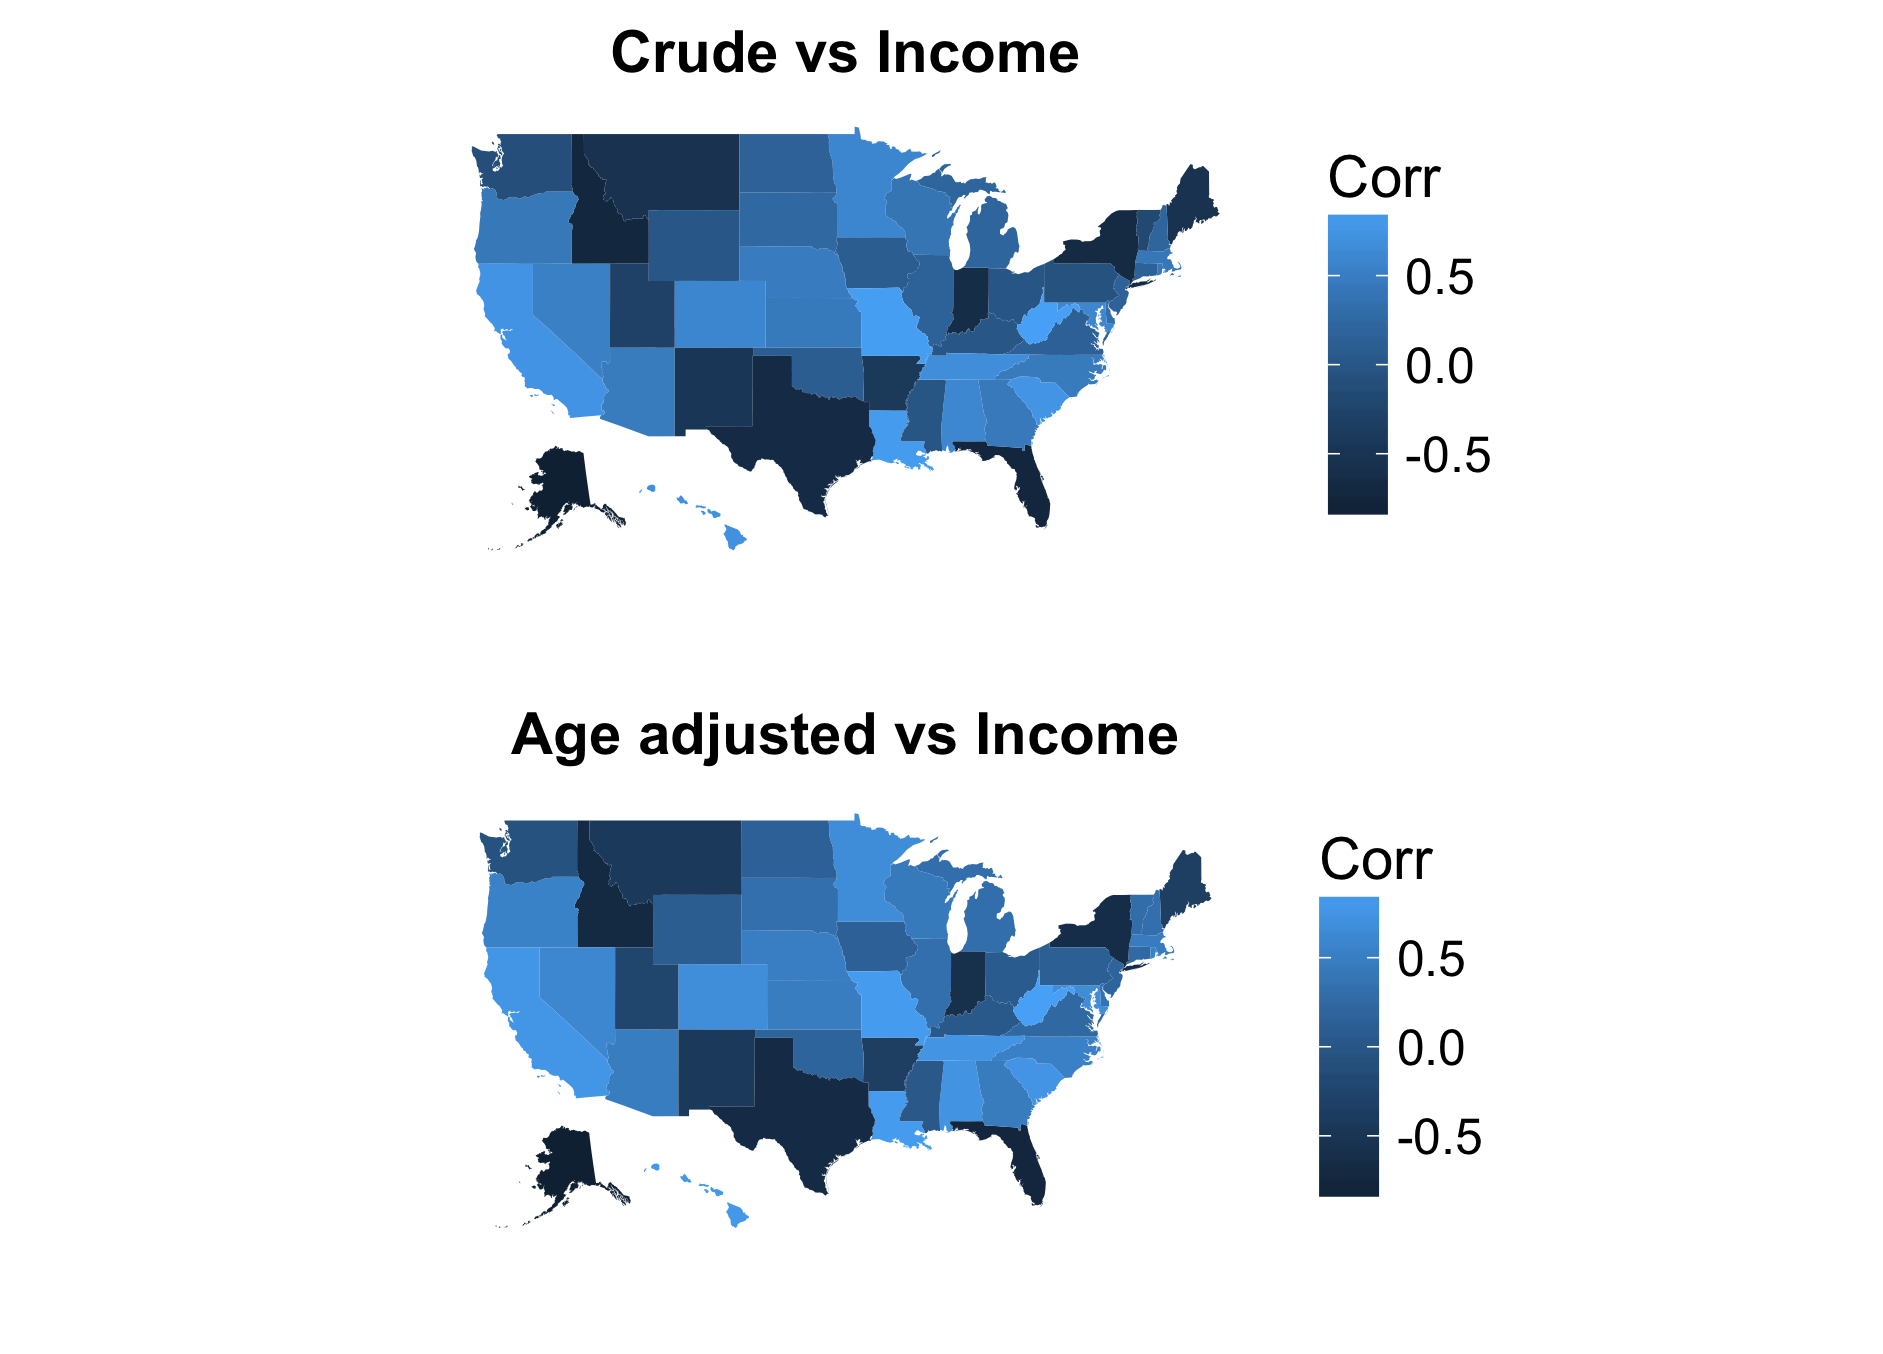

In [18]:
Image.open('income.png')

Similarly, poverty seems to indicate directly opposite of income, and in fact it is the only indicator that Mid South (Texas in particular) seems to be correlated to which in a way makes sense considering that it doesnt have higher than average mean income. Additionally, poverty doesnt seem to correlate in western states so much, its exactly negativly correlated which may indicate people are happier with less money.

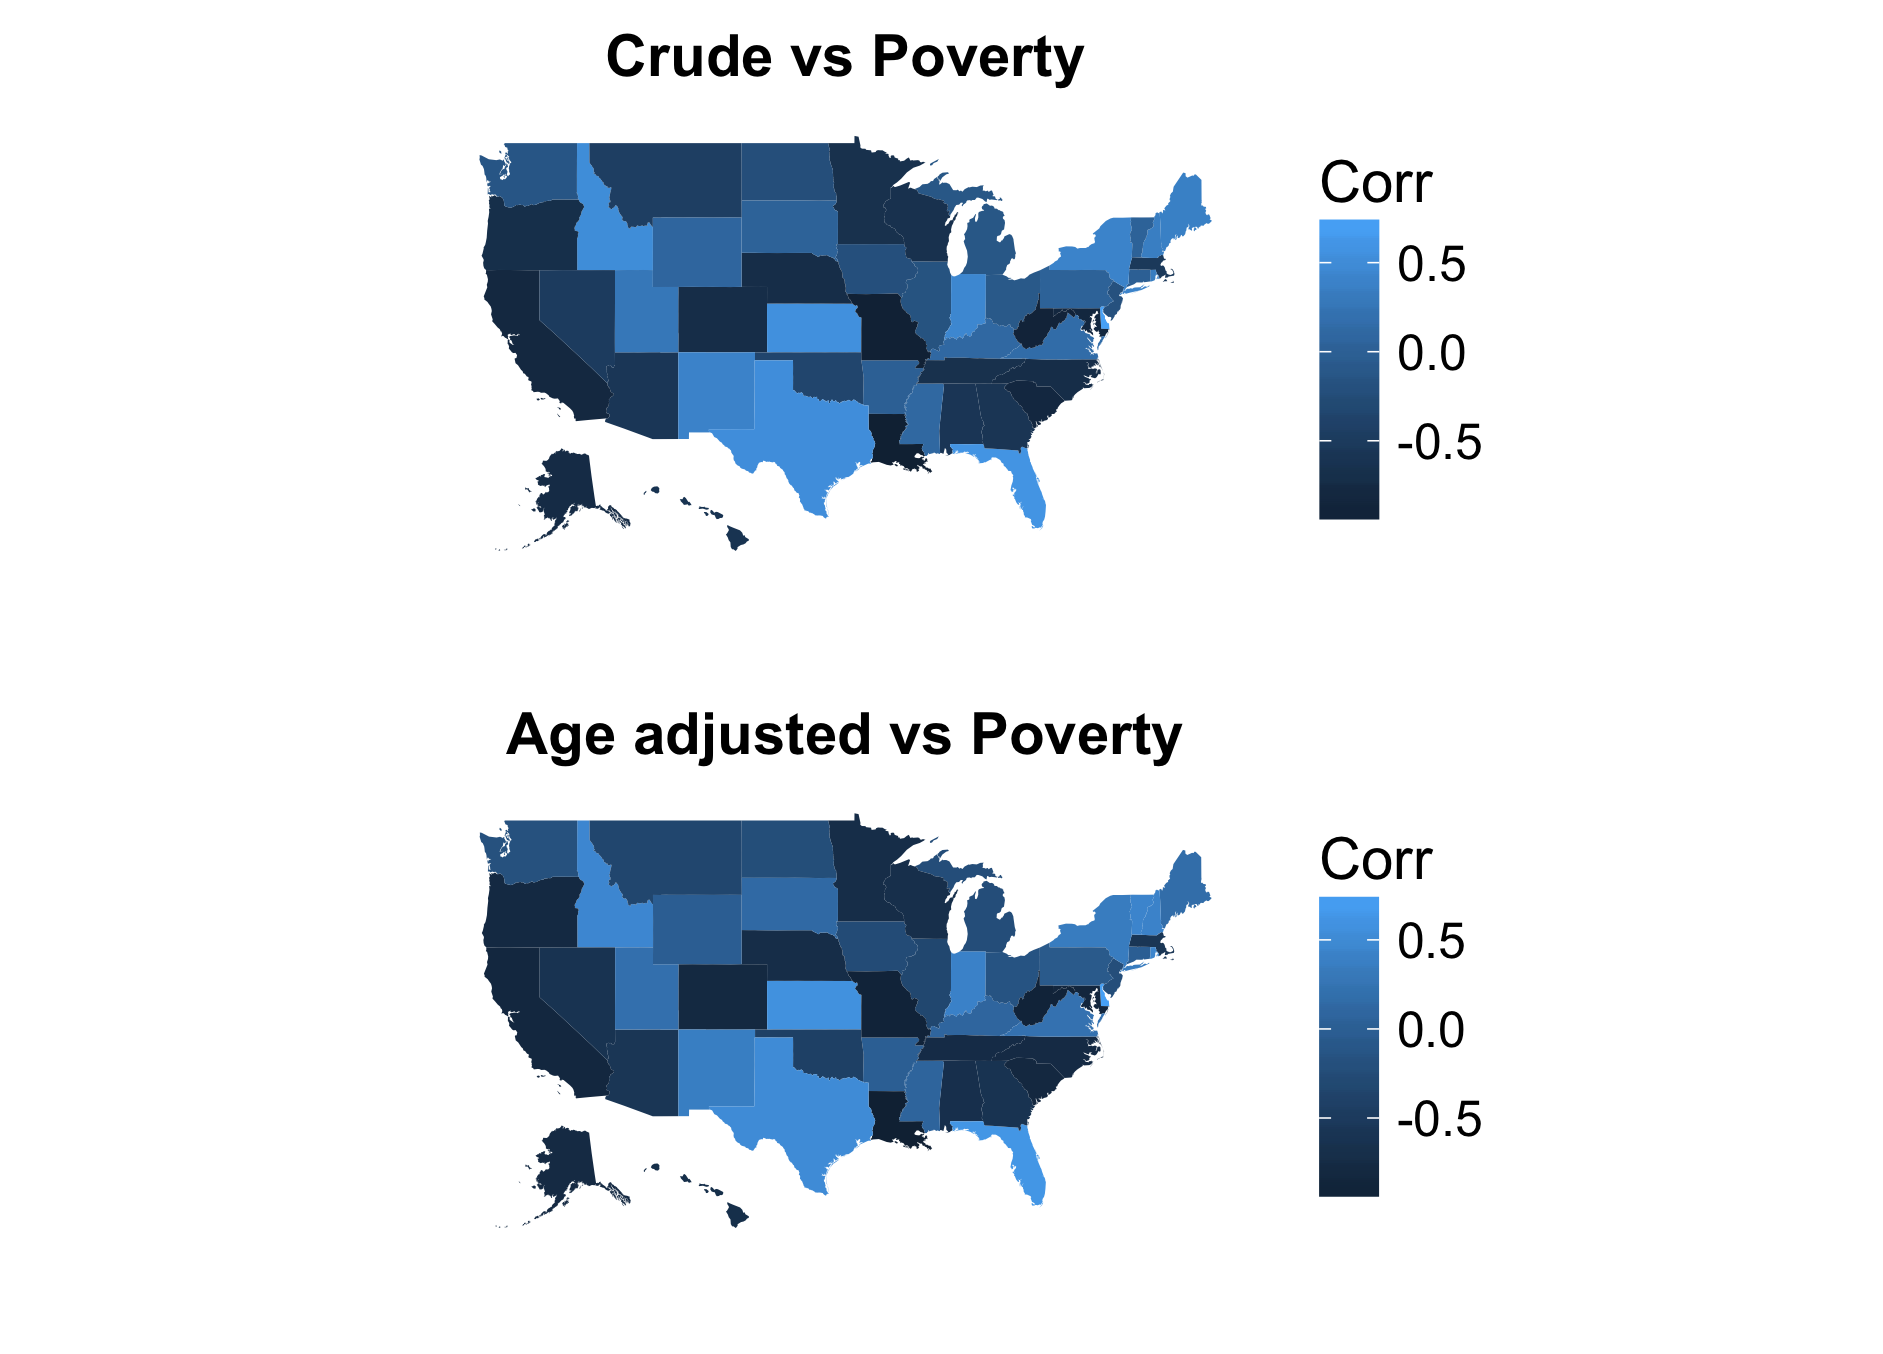

In [19]:
Image.open('poverty.png')

Temporal analysis of income and poverty vs ground truth indicates of significant divergence between income and poverty correlations as it spiked and shifted downwards, respectivly. Nontheless, the range of values that describes them doesnt seem to be so significant but trend is very indicative.

Temporal analysis of crude and age adjusted data yield similar results.

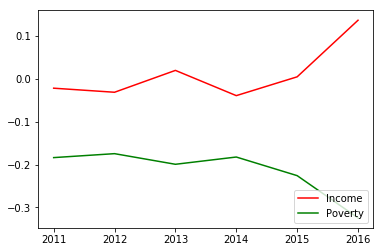

In [20]:
# Plot temporal correlation data between crude ground trurth and 5 google trend queries.
plt.gca().set_color_cycle(['red', 'green'])
plt.plot(years, crVSincYcorrDf['Corr'])
plt.plot(years, crVSpovYcorrDf['Corr'])
plt.legend(['Income','Poverty'], loc='lower right')
plt.show()

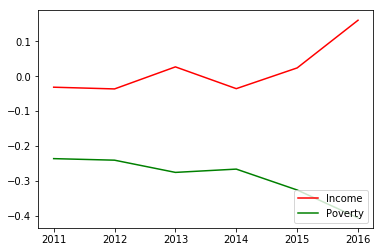

In [21]:
plt.gca().set_color_cycle(['red', 'green'])
plt.plot(years, agVSincYcorrDf['Corr'])
plt.plot(years, agVSpovYcorrDf['Corr'])
plt.legend(['Income','Poverty'], loc='lower right')
plt.show()

# Part 2.1

I've decided to build a dataset based on google query data as well as spatial correlation data however correlation data for all but query2 generated higher RMSE hence I've decided to use only correlation data from query2 and data from all google queries.

In [22]:
# Concatante google trends data together with ground truth in order to build regression model

temp1 = crVSq1[['Year','Data_Value','States','Depression']]
temp2 = crVSq2[['Year','Data_Value','States','MDD']]
temp3 = crVSq3[['Year','Data_Value','States','moodDisorder']]
temp4 = crVSq4[['Year','Data_Value','States','ICD10']]
temp5 = crVSq5[['Year','Data_Value','States','Suicide']]

result = pd.concat([temp1, temp2, temp3, temp4, temp5], axis=1, join='inner')
result1 = result[['Depression','MDD','moodDisorder','ICD10','Suicide']]
#result.columns = ['Year','GTrend','State','Depression','Five','Six','Seven','MDD','Nine','Ten','Eleven','Twelve','Thirteen',
#                  'Fourtenn','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen','Twenty']
result1['Year'] = temp1['Year']
result1['States'] = temp1['States']
result1['Data_Value'] = temp1['Data_Value']
result1.head()

,Depression,MDD,moodDisorder,ICD10,Suicide,Year,States,Data_Value
0,78.0,85.0,61.0,41.0,88.0,2011,Alaska,16.5
1,82.0,79.0,80.0,46.0,85.0,2012,Alaska,16.9
2,79.0,75.0,89.0,41.0,94.0,2013,Alaska,16.3
3,84.0,74.0,61.0,52.0,94.0,2014,Alaska,15.6
4,77.0,78.0,85.0,62.0,98.0,2015,Alaska,16.0


In [23]:
# Add correlation data to dataset
result1['States1'] = pd.Categorical(result1['States'])
result1['States1'] = result1['States1'].cat.codes
crVSq1corrDf.columns = ['States','CorrQ1']
crVSq2corrDf.columns = ['States','CorrQ2']
crVSq3corrDf.columns = ['States','CorrQ3']
crVSq4corrDf.columns = ['States','CorrQ4']
crVSq5corrDf.columns = ['States','CorrQ5']

result11 = result1.merge(crVSq1corrDf, on='States', how ='left')
result12 = result11.merge(crVSq2corrDf, on= 'States', how ='left')
result13 = result12.merge(crVSq3corrDf, on= 'States', how ='left')
result14 = result13.merge(crVSq4corrDf, on= 'States', how ='left')
result15 = result14.merge(crVSq5corrDf, on= 'States', how ='left')
result15 = result15.fillna(0.01)
result15.tail()


,Depression,MDD,moodDisorder,ICD10,Suicide,Year,States,Data_Value,States1,CorrQ1,CorrQ2,CorrQ3,CorrQ4,CorrQ5
326,84.0,98.0,89.0,40.0,94.0,2012,Wyoming,18.0,51,-0.542463,-0.41041,0.550346,-0.542463,0.269704
327,82.0,67.0,56.0,40.0,84.0,2013,Wyoming,18.7,51,-0.542463,-0.41041,0.550346,-0.542463,0.269704
328,90.0,84.0,45.0,31.0,95.0,2014,Wyoming,19.0,51,-0.542463,-0.41041,0.550346,-0.542463,0.269704
329,81.0,70.0,75.0,57.0,100.0,2015,Wyoming,20.9,51,-0.542463,-0.41041,0.550346,-0.542463,0.269704
330,88.0,82.0,31.0,52.0,92.0,2016,Wyoming,15.5,51,-0.542463,-0.41041,0.550346,-0.542463,0.269704


In [24]:
#setup a kfold cross validation by slicing dataset and using it as train, then take mean of all RMSE.
m2err = {}
result15['Index'] = result15.index
kfolds = 5
subsetSize = len(result15)/kfolds
for i in range(kfolds):
    testData = result15.iloc[int(subsetSize)*i:int(subsetSize)*(i+1)]
    trainData = result15[~result15['Index'].isin(testData['Index'])]
    test1 = testData[['Depression','MDD','moodDisorder','ICD10','Suicide','Year','States1','CorrQ1','CorrQ2']]
    feature_cols = ['Depression', 'MDD', 'moodDisorder','ICD10','Suicide','Year','States1','CorrQ1','CorrQ2']
    X = trainData[feature_cols]
    y = trainData.Data_Value
    lm = LinearRegression()
    lm.fit(X, y)
    m2err[i] = mean_squared_error(testData['Data_Value'], lm.predict(test1))

In [25]:
m2errDf = pd.DataFrame(m2err, index=list(range(1, 2)))
m2errDf = m2errDf.transpose()
m2errDf.columns = ["mean2err"]
print("\n Average RMSE: " + str(round(sum(m2errDf['mean2err'])/len(m2errDf['mean2err']),4)))


 Average RMSE: 11.7804


# Part 2.2

In [26]:
# Add income data
part2 = result15.merge(inc1, on = ['Year','States1'], how='left')
part2 = part2.fillna(1)

In [27]:
m22err = {}
part2['Index'] = part2.index
kfolds = 5
subsetSize = len(part2)/kfolds
for i in range(kfolds):
    testData = part2.iloc[int(subsetSize)*i:int(subsetSize)*(i+1)]
    trainData = part2[~part2['Index'].isin(testData['Index'])]
    #test1 = testData[['Depression','MDD','moodDisorder','ICD10','Suicide','Year','Value','States1']]
    #feature_cols = ['Depression', 'MDD', 'moodDisorder','ICD10','Suicide','Year','Value','States1']
    test1 = testData[['Depression','MDD','moodDisorder','ICD10','Suicide','Year','Value','States1','CorrQ2']]
    feature_cols = ['Depression', 'MDD','moodDisorder','ICD10','Suicide','Year','Value','States1','CorrQ2']
    X = trainData[feature_cols]
    y = trainData.Data_Value
    lm = LinearRegression()
    lm.fit(X, y)
    m22err[i] = mean_squared_error(testData['Data_Value'], lm.predict(test1))

In [28]:
m22errDf = pd.DataFrame(m22err, index=list(range(1, 2)))
m22errDf = m22errDf.transpose()
m22errDf.columns = ["mean2err"]
print("\n Average RMSE: " + str(round(sum(m22errDf['mean2err'])/len(m22errDf['mean2err']),4)))


 Average RMSE: 10.9141


# Part 2.3

In [29]:
part3 = part2.merge(pov1, on = ['Year','States1'], how='left')
part3 = part3.fillna(1)
part3.head()

,Depression,MDD,moodDisorder,ICD10,Suicide,Year,States,Data_Value,States1,CorrQ1,CorrQ2,CorrQ3,CorrQ4,CorrQ5,Index,Value_x,Value_y,HealthIns
0,78.0,85.0,61.0,41.0,88.0,2011,Alaska,16.5,2,-0.349431,0.778892,0.160393,-0.349431,-0.818651,0,1.0,1.0,1.0
1,82.0,79.0,80.0,46.0,85.0,2012,Alaska,16.9,2,-0.349431,0.778892,0.160393,-0.349431,-0.818651,1,1.0,1.0,1.0
2,79.0,75.0,89.0,41.0,94.0,2013,Alaska,16.3,2,-0.349431,0.778892,0.160393,-0.349431,-0.818651,2,1.0,1.0,1.0
3,84.0,74.0,61.0,52.0,94.0,2014,Alaska,15.6,2,-0.349431,0.778892,0.160393,-0.349431,-0.818651,3,1.0,1.0,1.0
4,77.0,78.0,85.0,62.0,98.0,2015,Alaska,16.0,2,-0.349431,0.778892,0.160393,-0.349431,-0.818651,4,1.0,1.0,1.0


In [30]:
m23err = {}
part3['Index'] = part3.index
kfolds = 5
subsetSize = len(part3)/kfolds
for i in range(kfolds):
    testData = part3.iloc[int(subsetSize)*i:int(subsetSize)*(i+1)]
    trainData = part3[~part3['Index'].isin(testData['Index'])]
    test1 = testData[['Depression','moodDisorder','ICD10','Suicide','Year','States1','Value_x','Value_y','HealthIns','CorrQ2']]
    feature_cols = ['Depression', 'moodDisorder','ICD10','Suicide','Year','States1','Value_x','Value_y','HealthIns','CorrQ2']
    X = trainData[feature_cols]
    y = trainData.Data_Value
    lm = LinearRegression()
    lm.fit(X, y)
    m23err[i] = mean_squared_error(testData['Data_Value'], lm.predict(test1))

In [31]:
m23errDf = pd.DataFrame(m23err, index=list(range(1, 2)))
m23errDf = m23errDf.transpose()
m23errDf.columns = ["mean2err"]
print("\n Average RMSE: " + str(round(sum(m23errDf['mean2err'])/len(m23errDf['mean2err']),4)))


 Average RMSE: 10.7969
